### BADASS Analysis - can we tell the difference between: (i) nucleobases and nucleosides; (ii) purines and pyrimidines; (iii) A, G, T and C?

In [1]:
from subroutines.parse_array_data import ParseArrayData
from subroutines.train import RunML

In [2]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### Parse in input data

Nucleobase and Nucleoside data

In [3]:
nn_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10', 'repeat_11', 'repeat_12', 'repeat_13', 'repeat_14', 'repeat_15',
                  'repeat_16', 'repeat_17', 'repeat_18', 'repeat_19', 'repeat_20'],
    peptide_list=['No Pep', 'GRP22', 'GRP35', 'GRP46', 'GRP51', 'GRP52', 'GRP63', 'GRP80', 'Pent', 'Hex',
                  'Hex2', 'Hept', '24D', '24E', '24K', '17K'],
    results_dir='Analysis/Standard_array/NNs/',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Analysis/Standard_array/NNs/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Standard_array/NNs/?y


Locate xlsx files

In [4]:
nn_fluor_data.group_xlsx_repeats()

Read the data in each xlsx file into a dataframe and perform min-max scaling

In [5]:
nn_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/A_C_G_T_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/As_Cs_Gs_Ts_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/As_Cs_Gs_Ts_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/A_C_G_T_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/As_Cs_Gs_Ts_repeat_3.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/A_C_G_T_repeat_3.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/A_C_G_T_repeat_4.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson

Combines readings of the same analyte solution across different plates, then calculates the median reading for non-independent repeats of the same analyte 

In [6]:
nn_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: G, 0 (flagged readings = 17K: 0.5391977300191986) 
 Outlier excluded from final output dataset: As, 3 (flagged readings = GRP80: 0.21625497675837502) 
 Outlier excluded from final output dataset: As, 2 (flagged readings = 24K: 0.1344720189438957) 
 Outlier excluded from final output dataset: T, 5 (flagged readings = 17K: 2.059230814095656) 
 Outlier excluded from final output dataset: T, 12 (flagged readings = 17K: 1.3274076368867866) 


In [7]:
nn_fluor_data.ml_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,1.052112,0.953502,1.006420,1.016036,1.011205,0.905630,1.035300,0.988412,1.058909,1.055209,0.929779,0.894086,1.051610,1.082353,G
1,1.026289,1.023749,0.998121,1.002409,0.991889,0.936943,1.003224,0.927699,1.088840,1.023079,0.967536,0.933550,1.014540,1.076923,G
2,1.021944,1.014408,0.983809,0.987082,1.003720,1.020969,0.929775,0.850757,0.953836,0.941298,0.975959,1.009437,1.001756,1.021141,G
3,1.026119,1.152212,1.012851,1.005972,1.025242,0.951853,1.004542,0.950659,1.020236,0.975012,1.027388,0.952875,1.004435,1.107512,G
4,0.860884,1.001667,0.992879,0.970528,1.012234,1.055622,1.032816,0.800314,0.954301,1.038242,1.017308,1.015016,1.016710,1.084282,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1.000977,1.081186,0.989639,0.973818,1.015824,0.913676,1.006882,0.995228,0.992229,0.943284,0.919149,0.869543,0.956190,0.991861,Cs
151,1.078492,1.010302,1.026688,1.006133,0.961508,0.912680,0.979966,0.974904,1.065729,1.060519,0.974194,0.934683,0.971527,1.011210,Cs
152,1.031722,1.106210,0.987022,0.990436,0.973354,0.988775,0.995938,1.006195,1.054192,1.015657,0.994567,0.916895,1.007929,0.972881,Cs
153,1.115815,0.978723,1.023176,1.019583,0.971523,0.909408,0.968024,0.952767,1.026602,1.044427,0.896981,0.931141,0.970378,0.973475,Cs


Create dataframes of merged class data. Classes compared are:
- nucleobases vs. nucleosides
- purines vs. pyrimidines
- A vs. T vs. C vs. G

In [8]:
nside_nbase_fluor_data = copy.deepcopy(nn_fluor_data.ml_fluor_data)
label_conv_dict = {'A': 'Nucleobase',
                   'C': 'Nucleobase',
                   'T': 'Nucleobase',
                   'G': 'Nucleobase',
                   'As': 'Nucleoside',
                   'Cs': 'Nucleoside',
                   'Ts': 'Nucleoside',
                   'Gs': 'Nucleoside'}
analyte_list = [label_conv_dict[nside_nbase_fluor_data['Analyte'].tolist()[n]]
                for n in range(nside_nbase_fluor_data.shape[0])]
nside_nbase_fluor_data['Analyte'] = analyte_list

In [9]:
nside_nbase_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,1.052112,0.953502,1.006420,1.016036,1.011205,0.905630,1.035300,0.988412,1.058909,1.055209,0.929779,0.894086,1.051610,1.082353,Nucleobase
1,1.026289,1.023749,0.998121,1.002409,0.991889,0.936943,1.003224,0.927699,1.088840,1.023079,0.967536,0.933550,1.014540,1.076923,Nucleobase
2,1.021944,1.014408,0.983809,0.987082,1.003720,1.020969,0.929775,0.850757,0.953836,0.941298,0.975959,1.009437,1.001756,1.021141,Nucleobase
3,1.026119,1.152212,1.012851,1.005972,1.025242,0.951853,1.004542,0.950659,1.020236,0.975012,1.027388,0.952875,1.004435,1.107512,Nucleobase
4,0.860884,1.001667,0.992879,0.970528,1.012234,1.055622,1.032816,0.800314,0.954301,1.038242,1.017308,1.015016,1.016710,1.084282,Nucleobase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1.000977,1.081186,0.989639,0.973818,1.015824,0.913676,1.006882,0.995228,0.992229,0.943284,0.919149,0.869543,0.956190,0.991861,Nucleoside
151,1.078492,1.010302,1.026688,1.006133,0.961508,0.912680,0.979966,0.974904,1.065729,1.060519,0.974194,0.934683,0.971527,1.011210,Nucleoside
152,1.031722,1.106210,0.987022,0.990436,0.973354,0.988775,0.995938,1.006195,1.054192,1.015657,0.994567,0.916895,1.007929,0.972881,Nucleoside
153,1.115815,0.978723,1.023176,1.019583,0.971523,0.909408,0.968024,0.952767,1.026602,1.044427,0.896981,0.931141,0.970378,0.973475,Nucleoside


In [10]:
pur_pyr_fluor_data = copy.deepcopy(nn_fluor_data.ml_fluor_data)
label_conv_dict = {'A': 'Purine',
                   'C': 'Pyrimidine',
                   'T': 'Pyrimidine',
                   'G': 'Purine',
                   'As': 'Purine',
                   'Cs': 'Pyrimidine',
                   'Ts': 'Pyrimidine',
                   'Gs': 'Purine'}
analyte_list = [label_conv_dict[pur_pyr_fluor_data['Analyte'].tolist()[n]]
                for n in range(pur_pyr_fluor_data.shape[0])]
pur_pyr_fluor_data['Analyte'] = analyte_list

In [11]:
pur_pyr_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,1.052112,0.953502,1.006420,1.016036,1.011205,0.905630,1.035300,0.988412,1.058909,1.055209,0.929779,0.894086,1.051610,1.082353,Purine
1,1.026289,1.023749,0.998121,1.002409,0.991889,0.936943,1.003224,0.927699,1.088840,1.023079,0.967536,0.933550,1.014540,1.076923,Purine
2,1.021944,1.014408,0.983809,0.987082,1.003720,1.020969,0.929775,0.850757,0.953836,0.941298,0.975959,1.009437,1.001756,1.021141,Purine
3,1.026119,1.152212,1.012851,1.005972,1.025242,0.951853,1.004542,0.950659,1.020236,0.975012,1.027388,0.952875,1.004435,1.107512,Purine
4,0.860884,1.001667,0.992879,0.970528,1.012234,1.055622,1.032816,0.800314,0.954301,1.038242,1.017308,1.015016,1.016710,1.084282,Purine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1.000977,1.081186,0.989639,0.973818,1.015824,0.913676,1.006882,0.995228,0.992229,0.943284,0.919149,0.869543,0.956190,0.991861,Pyrimidine
151,1.078492,1.010302,1.026688,1.006133,0.961508,0.912680,0.979966,0.974904,1.065729,1.060519,0.974194,0.934683,0.971527,1.011210,Pyrimidine
152,1.031722,1.106210,0.987022,0.990436,0.973354,0.988775,0.995938,1.006195,1.054192,1.015657,0.994567,0.916895,1.007929,0.972881,Pyrimidine
153,1.115815,0.978723,1.023176,1.019583,0.971523,0.909408,0.968024,0.952767,1.026602,1.044427,0.896981,0.931141,0.970378,0.973475,Pyrimidine


In [12]:
actg_fluor_data = copy.deepcopy(nn_fluor_data.ml_fluor_data)
label_conv_dict = {'A': 'a',
                   'C': 'c',
                   'T': 't',
                   'G': 'g',
                   'As': 'a',
                   'Cs': 'c',
                   'Ts': 't',
                   'Gs': 'g'}
analyte_list = [label_conv_dict[actg_fluor_data['Analyte'].tolist()[n]] for n in range(actg_fluor_data.shape[0])]
actg_fluor_data['Analyte'] = analyte_list

In [13]:
actg_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,1.052112,0.953502,1.006420,1.016036,1.011205,0.905630,1.035300,0.988412,1.058909,1.055209,0.929779,0.894086,1.051610,1.082353,g
1,1.026289,1.023749,0.998121,1.002409,0.991889,0.936943,1.003224,0.927699,1.088840,1.023079,0.967536,0.933550,1.014540,1.076923,g
2,1.021944,1.014408,0.983809,0.987082,1.003720,1.020969,0.929775,0.850757,0.953836,0.941298,0.975959,1.009437,1.001756,1.021141,g
3,1.026119,1.152212,1.012851,1.005972,1.025242,0.951853,1.004542,0.950659,1.020236,0.975012,1.027388,0.952875,1.004435,1.107512,g
4,0.860884,1.001667,0.992879,0.970528,1.012234,1.055622,1.032816,0.800314,0.954301,1.038242,1.017308,1.015016,1.016710,1.084282,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1.000977,1.081186,0.989639,0.973818,1.015824,0.913676,1.006882,0.995228,0.992229,0.943284,0.919149,0.869543,0.956190,0.991861,c
151,1.078492,1.010302,1.026688,1.006133,0.961508,0.912680,0.979966,0.974904,1.065729,1.060519,0.974194,0.934683,0.971527,1.011210,c
152,1.031722,1.106210,0.987022,0.990436,0.973354,0.988775,0.995938,1.006195,1.054192,1.015657,0.994567,0.916895,1.007929,0.972881,c
153,1.115815,0.978723,1.023176,1.019583,0.971523,0.909408,0.968024,0.952767,1.026602,1.044427,0.896981,0.931141,0.970378,0.973475,c


Generates "representative" fingerprint for each class (by calculating the median value for each feature)

Nucleosides vs. nucleobases

Nucleobase


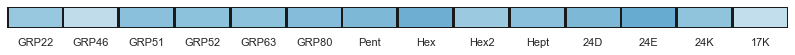

Nucleoside


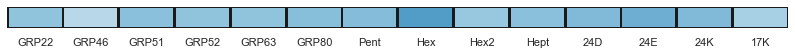

In [14]:
classes = []
for class_name in nside_nbase_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
nside_nbase_fluor_data_x_val = nside_nbase_fluor_data.drop(['Analyte'], axis=1)
vmin = nside_nbase_fluor_data_x_val.values.min()
vmax = nside_nbase_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(nside_nbase_fluor_data.shape[0])
                     if nside_nbase_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(nside_nbase_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(14,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=nside_nbase_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

Purines vs. pyrimidines

Purine


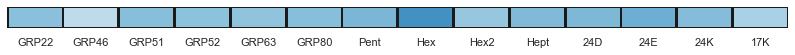

Pyrimidine


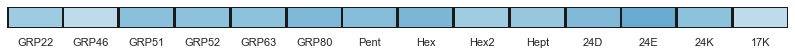

In [15]:
classes = []
for class_name in pur_pyr_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
pur_pyr_fluor_data_x_val = pur_pyr_fluor_data.drop(['Analyte'], axis=1)
vmin = pur_pyr_fluor_data_x_val.values.min()
vmax = pur_pyr_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(pur_pyr_fluor_data.shape[0])
                     if pur_pyr_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(pur_pyr_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(14,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=pur_pyr_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

A vs. T vs. C vs. G

g


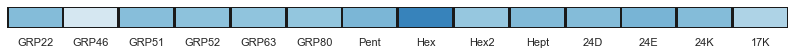

a


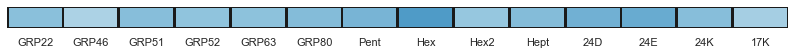

c


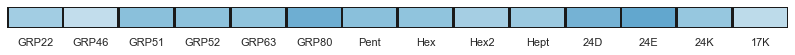

t


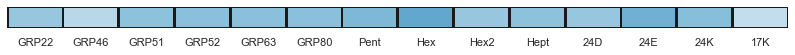

In [16]:
classes = []
for class_name in actg_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
actg_fluor_data_x_val = actg_fluor_data.drop(['Analyte'], axis=1)
vmin = actg_fluor_data_x_val.values.min()
vmax = actg_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(actg_fluor_data.shape[0])
                     if actg_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(actg_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(14,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=actg_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

Generates box plots to compare the distribution of values for each class across the 14 features

Nucleoside


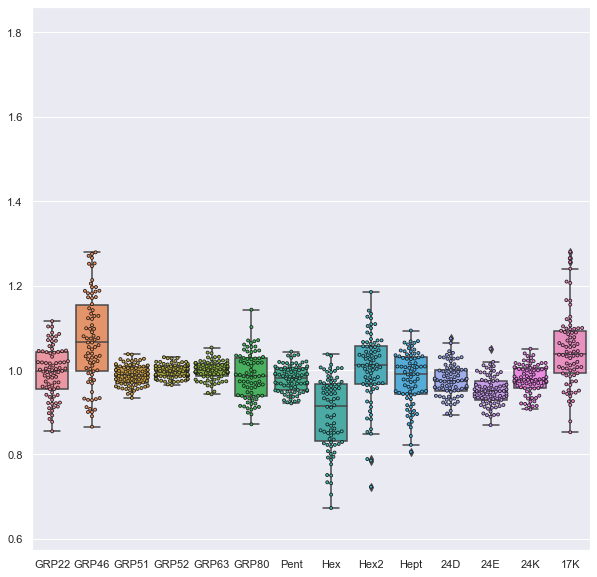

Nucleobase


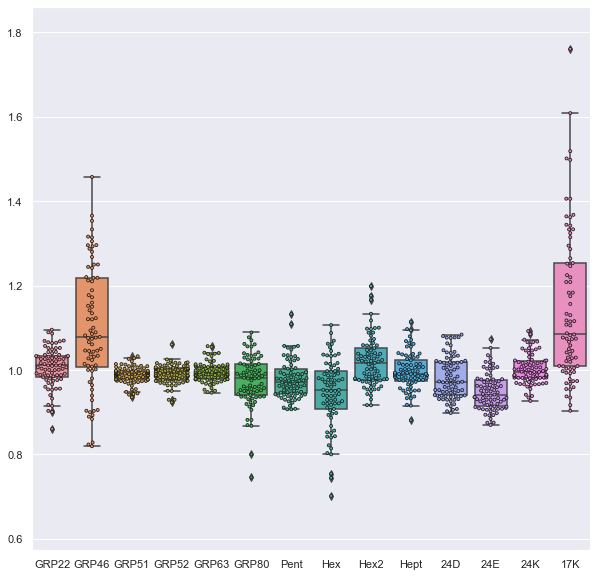

In [17]:
ymin = nside_nbase_fluor_data.drop('Analyte', axis=1).min().min() - 0.1
ymax = nside_nbase_fluor_data.drop('Analyte', axis=1).max().max() + 0.1

nside_indices = [int(i) for i in range(nside_nbase_fluor_data.shape[0])
                 if nside_nbase_fluor_data['Analyte'][i] == 'Nucleoside']
nbase_indices = [int(i) for i in range(nside_nbase_fluor_data.shape[0])
                 if nside_nbase_fluor_data['Analyte'][i] == 'Nucleobase']

sns.set(rc={'figure.figsize':(10,10)})
print('Nucleoside')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=nside_nbase_fluor_data.iloc[nside_indices])
sns.swarmplot(data=nside_nbase_fluor_data.iloc[nside_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Nucleobase')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=nside_nbase_fluor_data.iloc[nbase_indices])
sns.swarmplot(data=nside_nbase_fluor_data.iloc[nbase_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

Purine


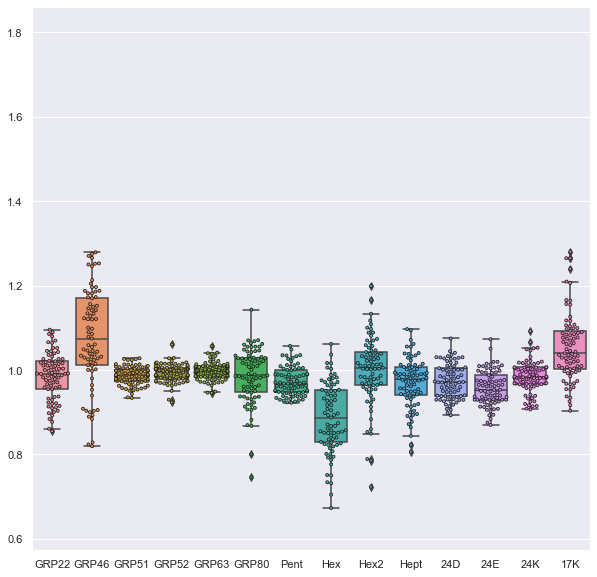

Pyrimidine


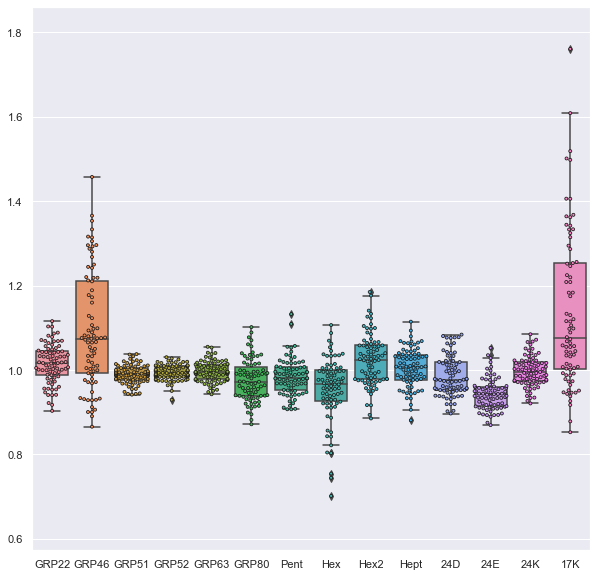

In [18]:
ymin = pur_pyr_fluor_data.drop('Analyte', axis=1).min().min() - 0.1
ymax = pur_pyr_fluor_data.drop('Analyte', axis=1).max().max() + 0.1

pur_indices = [int(i) for i in range(pur_pyr_fluor_data.shape[0])
               if pur_pyr_fluor_data['Analyte'][i] == 'Purine']
pyr_indices = [int(i) for i in range(pur_pyr_fluor_data.shape[0])
               if pur_pyr_fluor_data['Analyte'][i] == 'Pyrimidine']

print('Purine')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=pur_pyr_fluor_data.iloc[pur_indices])
sns.swarmplot(data=pur_pyr_fluor_data.iloc[pur_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Pyrimidine')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=pur_pyr_fluor_data.iloc[pyr_indices])
sns.swarmplot(data=pur_pyr_fluor_data.iloc[pyr_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

a


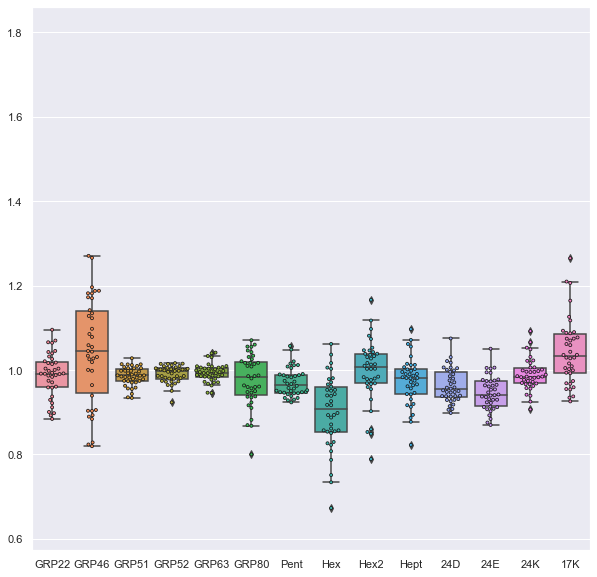

c


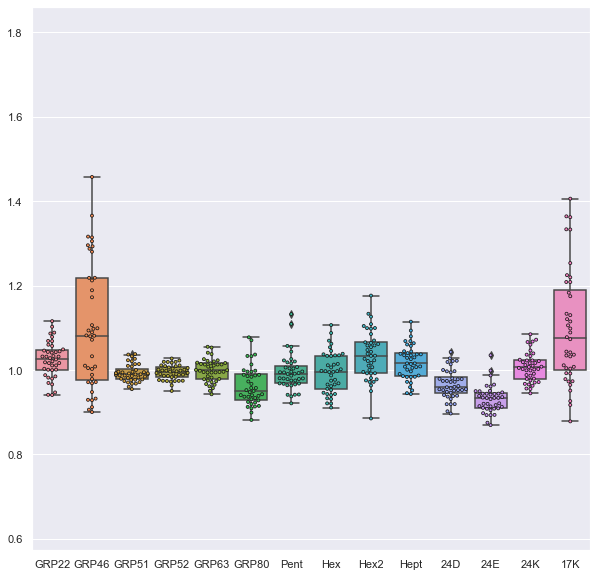

t


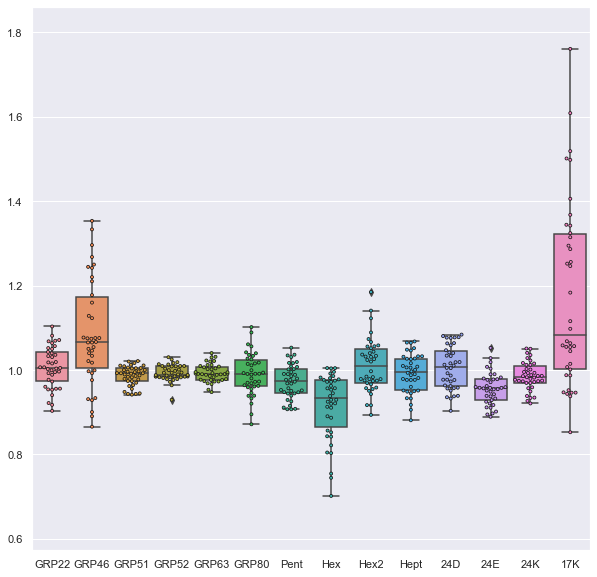

g


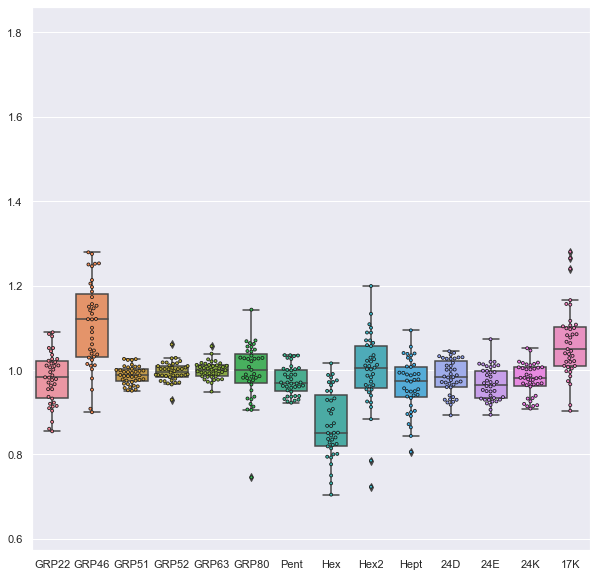

In [19]:
ymin = actg_fluor_data.drop('Analyte', axis=1).min().min() - 0.1
ymax = actg_fluor_data.drop('Analyte', axis=1).max().max() + 0.1

a_indices = [int(i) for i in range(actg_fluor_data.shape[0])
                if actg_fluor_data['Analyte'][i] == 'a']
c_indices = [int(i) for i in range(actg_fluor_data.shape[0])
                if actg_fluor_data['Analyte'][i] == 'c']
t_indices = [int(i) for i in range(actg_fluor_data.shape[0])
                if actg_fluor_data['Analyte'][i] == 't']
g_indices = [int(i) for i in range(actg_fluor_data.shape[0])
                if actg_fluor_data['Analyte'][i] == 'g']

print('a')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=actg_fluor_data.iloc[a_indices])
sns.swarmplot(data=actg_fluor_data.iloc[a_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('c')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=actg_fluor_data.iloc[c_indices])
sns.swarmplot(data=actg_fluor_data.iloc[c_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('t')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=actg_fluor_data.iloc[t_indices])
sns.swarmplot(data=actg_fluor_data.iloc[t_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('g')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=actg_fluor_data.iloc[g_indices])
sns.swarmplot(data=actg_fluor_data.iloc[g_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

#### Run machine learning

In [20]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### - Nucleosides vs. nucleobases

First split the data into a training and test set

In [21]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Standard_array/'
                'NNs/NN_ML_results_nbase_nside_split/',
    fluor_data=nside_nbase_fluor_data
)

In [22]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 14 features

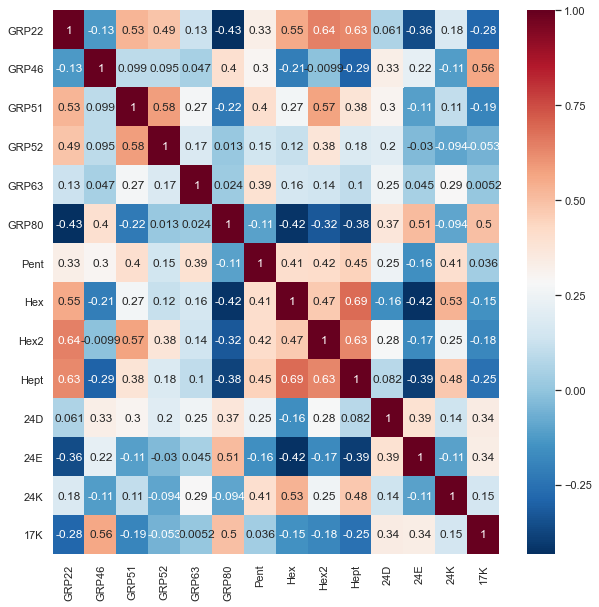

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
GRP22,1.000000,-0.125926,0.526303,0.485898,0.127972,-0.432745,0.332935,0.553447,0.642738,0.627495,0.060630,-0.359325,0.175669,-0.282401
GRP46,-0.125926,1.000000,0.098856,0.094651,0.046934,0.398795,0.297051,-0.210609,-0.009874,-0.293851,0.333357,0.219497,-0.114856,0.562692
GRP51,0.526303,0.098856,1.000000,0.582814,0.272009,-0.222845,0.402820,0.265418,0.570974,0.381286,0.300786,-0.109935,0.108749,-0.189230
GRP52,0.485898,0.094651,0.582814,1.000000,0.172447,0.013264,0.147082,0.120650,0.378725,0.177497,0.195685,-0.030308,-0.093523,-0.053427
GRP63,0.127972,0.046934,0.272009,0.172447,1.000000,0.024421,0.392298,0.159453,0.142013,0.099807,0.250324,0.044588,0.287129,0.005221
GRP80,-0.432745,0.398795,-0.222845,0.013264,0.024421,1.000000,-0.106684,-0.417147,-0.323860,-0.381631,0.372524,0.508398,-0.093835,0.496471
Pent,0.332935,0.297051,0.402820,0.147082,0.392298,-0.106684,1.000000,0.410773,0.417853,0.450743,0.247530,-0.156489,0.405965,0.036473
Hex,0.553447,-0.210609,0.265418,0.120650,0.159453,-0.417147,0.410773,1.000000,0.473858,0.690107,-0.158802,-0.424708,0.533396,-0.152196
Hex2,0.642738,-0.009874,0.570974,0.378725,0.142013,-0.323860,0.417853,0.473858,1.000000,0.632319,0.278998,-0.171980,0.253189,-0.184960
Hept,0.627495,-0.293851,0.381286,0.177497,0.099807,-0.381631,0.450743,0.690107,0.632319,1.000000,0.082318,-0.394373,0.476369,-0.250765


In [23]:
ml.calc_feature_correlations(train_data=ml.fluor_data)

- Measure the relative importances of the initial 14 features

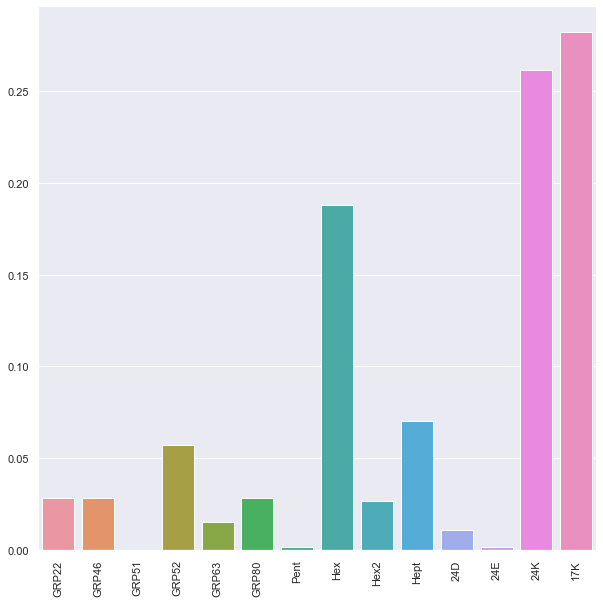

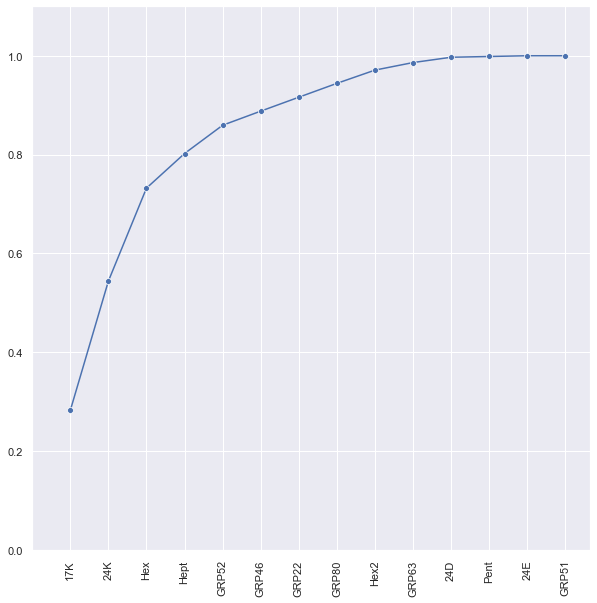

,Feature,Score
0,17K,2.822085e-01
1,24K,2.617250e-01
2,Hex,1.881745e-01
3,Hept,7.004870e-02
4,GRP52,5.721387e-02
5,GRP46,2.854231e-02
6,GRP22,2.817529e-02
7,GRP80,2.804261e-02
8,Hex2,2.682486e-02
9,GRP63,1.526128e-02


In [24]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

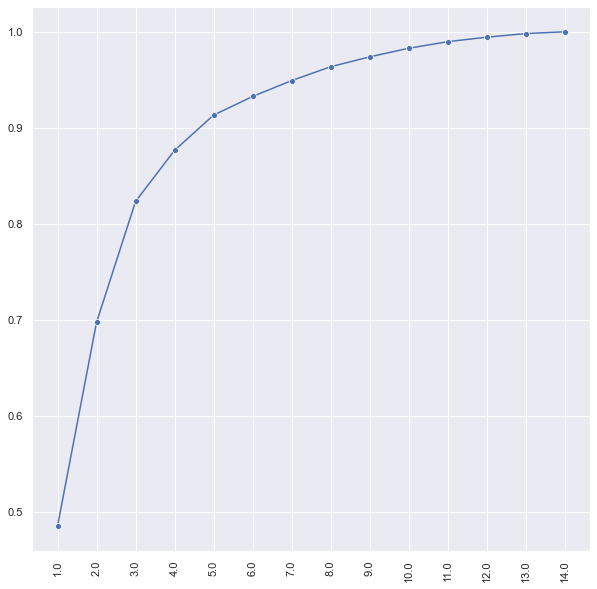

In [25]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 14 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [26]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 15)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [27]:
pca_components

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
Component,,,,,,,,,,,,,,
1,-0.109409,0.564599,-0.021235,-0.005454,-0.005467,0.174323,0.019029,-0.192529,-0.114463,-0.125951,0.111932,0.087437,-0.004097,0.742814
2,0.314488,0.273297,0.099613,0.050491,0.052090,-0.145682,0.206362,0.570392,0.475137,0.352985,0.100256,-0.105058,0.167532,0.150187
3,-0.005391,-0.731722,-0.057511,-0.049635,-0.018674,-0.034140,-0.106028,0.172392,-0.057471,0.115584,0.021091,0.029302,0.147900,0.613569
4,0.114215,-0.177845,0.102383,0.098205,0.082799,0.284624,-0.002970,-0.459766,0.532056,0.116309,0.493518,0.303167,-0.048940,-0.038244
5,0.262952,0.017122,0.046843,0.023598,-0.123889,-0.730803,-0.240284,-0.334893,0.228126,-0.111393,-0.095209,-0.133671,-0.301530,0.161858
6,-0.635664,0.014752,-0.055998,-0.240240,0.081468,-0.439109,0.327137,-0.168583,0.164556,0.100379,0.085560,0.073862,0.385879,-0.033712
7,-0.360556,0.042386,-0.087825,-0.105626,-0.156188,0.092227,-0.408974,0.353518,0.469730,-0.330607,-0.218804,0.344302,-0.166820,-0.001450
8,0.185457,0.011119,0.155965,0.067568,0.220806,-0.330357,0.079773,0.246576,-0.326508,-0.265650,0.301315,0.663804,-0.002925,-0.054074
9,0.259239,-0.052268,0.028851,0.114075,0.191809,0.086886,0.323291,-0.225446,0.178773,-0.133551,-0.711910,0.299040,0.255491,0.072267


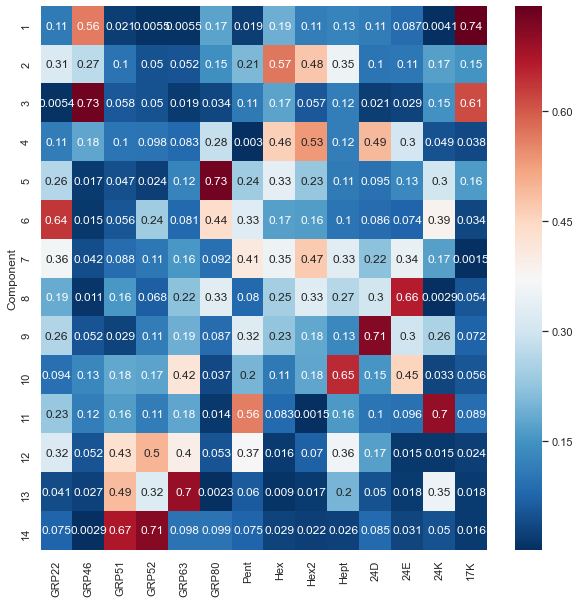

In [28]:
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Relative contribution to the different components of each barrel

In [29]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [30]:
relative_pca_components

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
Component,,,,,,,,,,,,,,
1,0.036378,0.254856,0.008190,0.002121,0.002010,0.069076,0.006381,0.064880,0.040412,0.041427,0.041510,0.032941,0.001559,0.358572
2,0.104567,0.123365,0.038418,0.019641,0.019156,0.057727,0.069199,0.192214,0.167752,0.116101,0.037180,0.039579,0.063754,0.072498
3,0.001792,0.330295,0.022181,0.019308,0.006867,0.013528,0.035554,0.058094,0.020291,0.038017,0.007822,0.011039,0.056283,0.296182
4,0.037976,0.080278,0.039487,0.038201,0.030449,0.112783,0.000996,0.154935,0.187848,0.038255,0.183020,0.114214,0.018624,0.018461
5,0.087431,0.007729,0.018066,0.009180,0.045560,0.289582,0.080574,0.112854,0.080542,0.036639,0.035308,0.050359,0.114747,0.078132
6,0.211357,0.006659,0.021597,0.093451,0.029960,0.173998,0.109698,0.056810,0.058098,0.033016,0.031730,0.027827,0.146846,0.016273
7,0.119884,0.019133,0.033872,0.041088,0.057438,0.036545,0.137141,0.119131,0.165843,0.108741,0.081143,0.129711,0.063483,0.000700
8,0.061664,0.005019,0.060152,0.026283,0.081201,0.130905,0.026750,0.083093,0.115277,0.087376,0.111742,0.250079,0.001113,0.026103
9,0.086197,0.023593,0.011127,0.044374,0.070537,0.034429,0.108409,0.075972,0.063118,0.043927,0.264011,0.112659,0.097227,0.034885


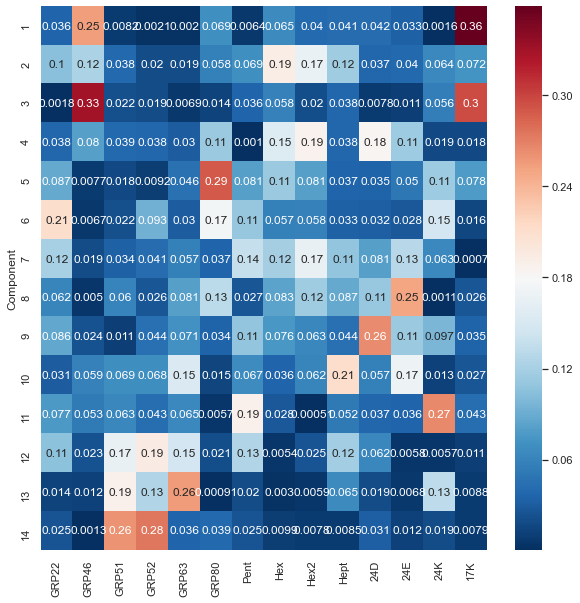

In [31]:
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Scatter plots of data transformed to PCA dimensions

In [32]:
def plot_scatter(x_data, y_data, dimensions, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    random.shuffle(extra_colours)
    colours += extra_colours
    markers = ['o', 'x', '^', '*']

    cat_colours = {}
    cat_markers = {}
    for index, cat in enumerate(categories):
        if index == 0:
            current_colour = colours[index]
            cat_colours[cat] = current_colour
            marker_count = 0
            cat_markers[cat] = markers[marker_count]
        else:
            if categories[index-1] == cat:
                cat_colours[cat] = current_colour
                cat_markers[cat] = markers[marker_count]
            elif categories[index-1].split('_')[0] == cat.split('_')[0]:
                cat_colours[cat] = current_colour
                marker_count += 1
                cat_markers[cat] = markers[marker_count]
            else:
                current_colour = colours[index]
                cat_colours[cat] = current_colour
                marker_count = 0
                cat_markers[cat] = markers[marker_count] 

    fig = plt.figure()
    if dimensions == 2:
        ax = fig.add_subplot(111)
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], c=cat_colours[y], marker=cat_markers[y])
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], x_data[i[0],2], c=cat_colours[y],
                                 marker=cat_markers[y])

    legend_elements = []
    for cat, colour in cat_colours.items():
        marker = cat_markers[cat]
        legend_elements.append(Line2D([0], [0], marker=marker, color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_{}_PCA_plot.svg'.format(results_dir, plot_id, str(dimensions)))
    plt.show()

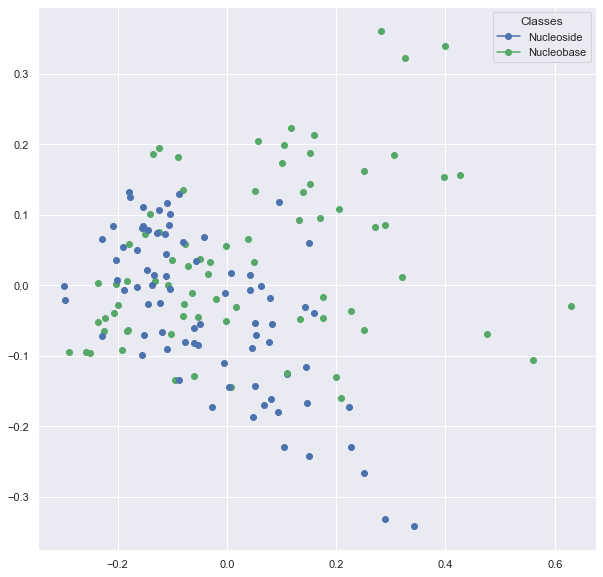

In [33]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['Nucleoside', 'Nucleobase'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

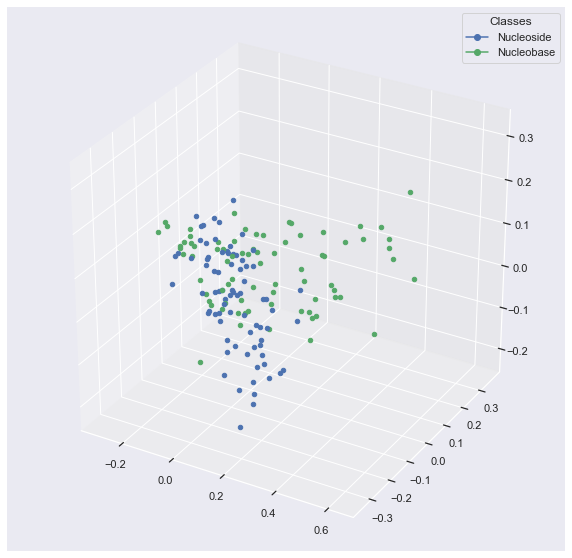

In [34]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['Nucleoside', 'Nucleobase'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

Based upon Scree plot, initially will try using all 14 features in the analysis. Will still run PCA however to ensure that the 14 features used are orthogonal.

In [35]:
n_components = 14

Since classes are very similar in size (they vary by a max of one or two data points), won't perform any class balancing.

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised, in combination with 5 different methods of dealing with imbalanced classes. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- transformation to 14 orthogonal dimensions using PCA
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [36]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)  # Actual number of x samples will be
    # different owing to oversampling, but don't want to hard code this selection into the pipeline, so for now
    # this estimate will do
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 0.31622776601683794}
Best score: 0.7013333333333333






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 0.31622776601683794}
Best score: 0.7013333333333333
All parameter combinations tested:
1 {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 1000.0} 0.685
2 {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.001} 0.628
3 {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'm

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 0.0625}
Best score: 0.7173333333333333






LinearSVC: no_balancing
Best parameters: {'LinearSVC__C': 0.0625}
Best score: 0.7173333333333333
All parameter combinations tested:
1 {'LinearSVC__C': 2.8284271247461903} 0.701
2 {'LinearSVC__C': 16384.0} 0.701
3 {'LinearSVC__C': 11.313708498984761} 0.701
4 {'LinearSVC__C': 1024.0} 0.701
5 {'LinearSVC__C': 1.4142135623730951} 0.701
6 {'LinearSVC__C': 4096.0} 0.701
7 {'LinearSVC__C': 0.0625} 0.717
8 {'LinearSVC__C': 8192.0} 0.701
9 {'LinearSVC__C': 724.0773439350247} 0.701
10 {'LinearSVC__C': 1.0} 0.701
11 {'LinearSVC__C': 0.7071067811865476} 0.701
12 {'LinearSVC__C': 2896.309375740099} 0.701
13 {'LinearSVC__C': 512.0} 0.701
14 {'LinearSVC__C': 5792.618751480198} 0.701
15 {'LinearSVC__C': 362.03867196751236} 0.701
16 {'LinearSVC__C': 32768.0} 0.701
17 {'LinearSVC__C': 2.0} 0.701
18 {'LinearSVC__C': 0.25} 0.701
19 {'LinearSVC__C': 0.1767766952966369} 0.693
20 {'

In [37]:
score_df

,Algorithm,Resampling_method,Best_params,Best_accuracy_score,Mean_accuracy_score,Std_dev_accuracy_score
0,LogisticRegression,no_balancing,"{'LogisticRegression__solver': 'saga', 'Logist...",0.701333,0.666510,0.053186
1,KNeighborsClassifier,no_balancing,"{'KNeighborsClassifier__weights': 'distance', ...",0.774000,0.717973,0.079852
2,GaussianNB,no_balancing,{},0.726667,0.726667,0.131318
3,LinearSVC,no_balancing,{'LinearSVC__C': 0.0625},0.717333,0.701627,0.024660
4,SVC,no_balancing,"{'SVC__gamma': 0.04419417382415922, 'SVC__C': ...",0.766333,0.620173,0.058064


So, from this spot check, a **k nearest neighbours classifier** does a good job.

So, run hyperparameter optimisation for KNN.

In [39]:
fixed_params = ml.define_fixed_model_params(clf=KNeighborsClassifier())
random_tuned_params = ml.define_tuned_model_params(clf=KNeighborsClassifier(), x_train=ml.train_x)

knn_random_search = ml.run_ml(
    clf=KNeighborsClassifier, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 2, 'KNeighborsClassifier__n_neighbors': 4}
Best score: 0.781


In [40]:
grid_tuned_params = {'n_neighbors': [int(n) for n in np.linspace(2, 20, 19)],
                     'p': np.array([1, 2]),
                     'weights': ['uniform', 'distance']}

knn_grid_search = ml.run_ml(
    clf=KNeighborsClassifier, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='grid search', fixed_params=fixed_params,
    tuned_params=grid_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'KNeighborsClassifier__n_neighbors': 6, 'KNeighborsClassifier__p': 1, 'KNeighborsClassifier__weights': 'distance'}
Best score: 0.782


### So, optimal hyperparameter combination:
- n_neighbors = 6
- p = 1
- weights = 'distance'

Model cross-validation score: [0.76       0.72       0.64       0.6        0.70833333]
accuracy_score: 0.6774193548387096
recall_score: 0.6770833333333333
precision_score: 0.6770833333333333
f1_score: 0.6770833333333333
cohen_kappa_score: 0.35416666666666674
None


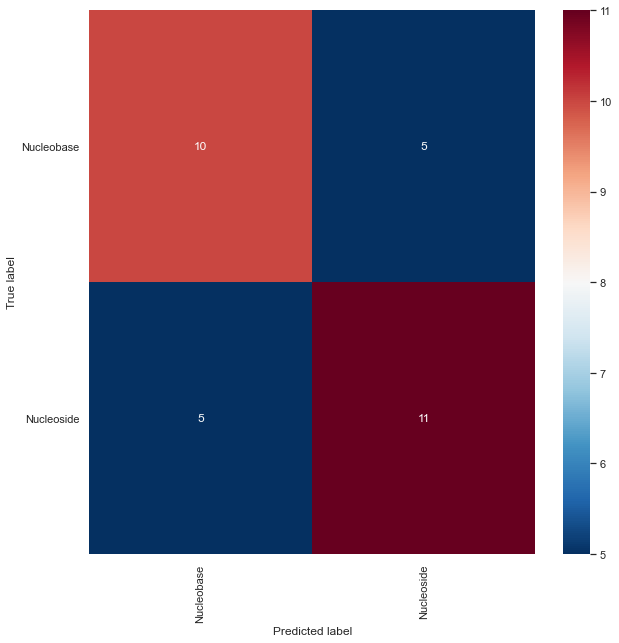

true


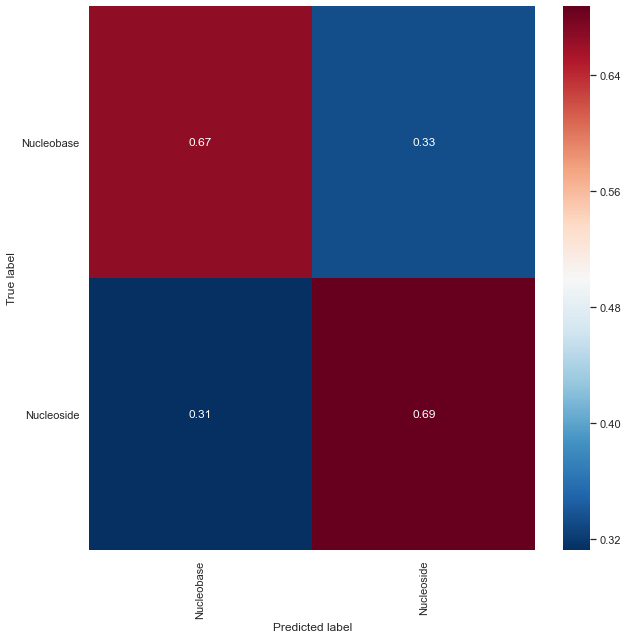

pred


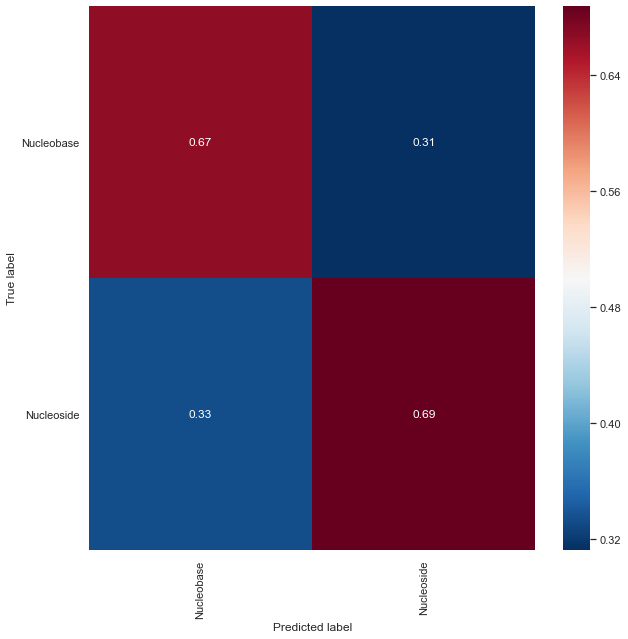

In [42]:
final_params = {'n_neighbors': 6,
                'p': 1,
                'weights': 'distance'}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

knn_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=KNeighborsClassifier, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

How well does the trained classifier predict the different classes?

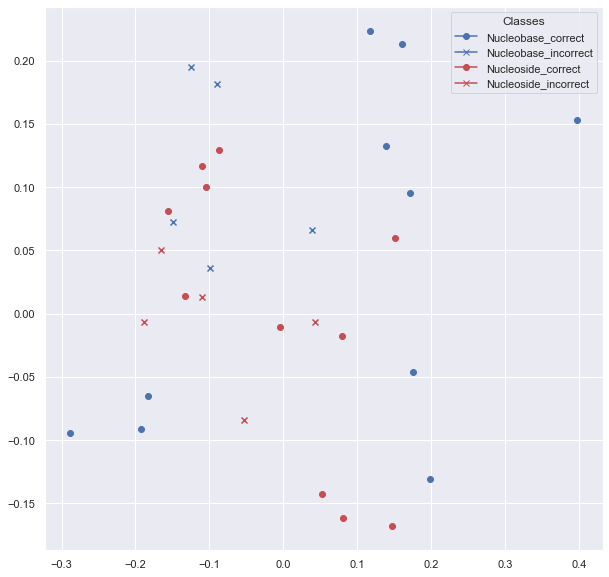

In [43]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 2D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['Nucleobase_correct', 'Nucleobase_incorrect', 'Nucleoside_correct', 'Nucleoside_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

#### - Purines vs. pyrimidines

First split the data into a training and test set

In [44]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Standard_array/'
                'NNs/NN_ML_results_pur_pyr_split/',
    fluor_data=pur_pyr_fluor_data
)

In [45]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Measure the relative importances of the initial 14 features

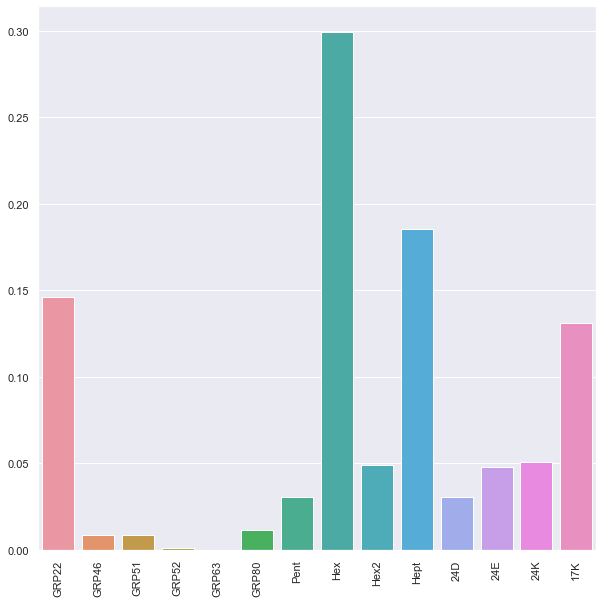

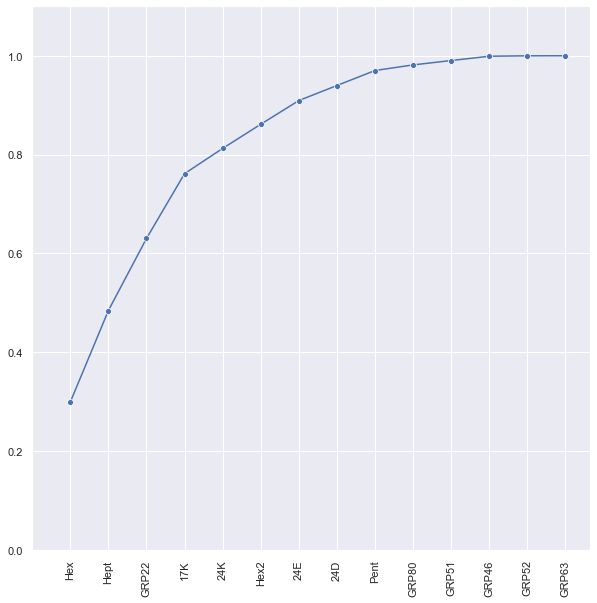

,Feature,Score
0,Hex,0.299108
1,Hept,0.185236
2,GRP22,0.145886
3,17K,0.131187
4,24K,0.051023
5,Hex2,0.048909
6,24E,0.047971
7,24D,0.030414
8,Pent,0.030374
9,GRP80,0.011333


In [46]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- PCA to determine the number of dimensions to reduce the data to has already been run => no reduction in feature number, but run PCA anyway to ensure that the features are orthogonal

Scatter plots of data transformed to PCA dimensions

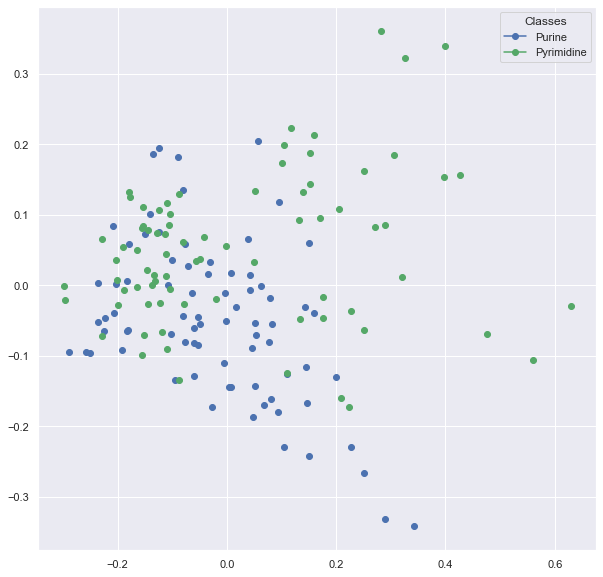

In [47]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['Purine', 'Pyrimidine'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

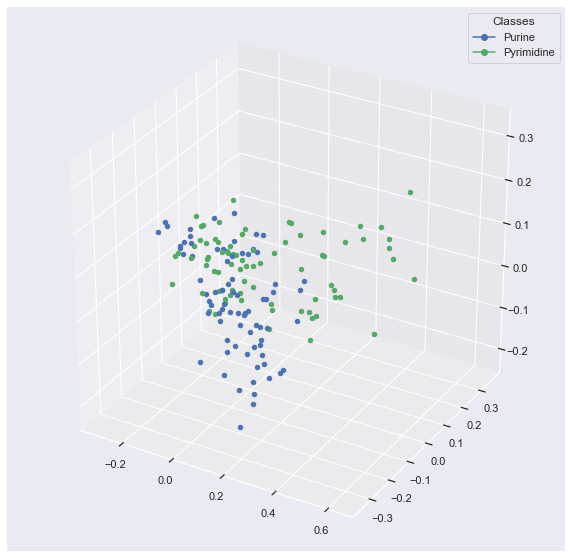

In [48]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['Purine', 'Pyrimidine'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

In [49]:
n_components = 14

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised, in combination with 5 different methods of dealing with imbalanced classes. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- transformation to 14 orthogonal dimensions using PCA
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [52]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 316.22776601683796}
Best score: 0.718






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 316.22776601683796}
Best score: 0.718
All parameter combinations tested:
1 {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 316.22776601683796} 0.718
2 {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 316.22776601683796} nan
3 {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'mult

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 0.1767766952966369}
Best score: 0.6936666666666667






LinearSVC: no_balancing
Best parameters: {'LinearSVC__C': 0.1767766952966369}
Best score: 0.6936666666666667
All parameter combinations tested:
1 {'LinearSVC__C': 1448.1546878700494} 0.686
2 {'LinearSVC__C': 2.8284271247461903} 0.686
3 {'LinearSVC__C': 0.1767766952966369} 0.694
4 {'LinearSVC__C': 11585.237502960395} 0.686
5 {'LinearSVC__C': 16384.0} 0.686
6 {'LinearSVC__C': 1.4142135623730951} 0.694
7 {'LinearSVC__C': 16.0} 0.686
8 {'LinearSVC__C': 1.0} 0.694
9 {'LinearSVC__C': 256.0} 0.686
10 {'LinearSVC__C': 2.0} 0.694
11 {'LinearSVC__C': 724.0773439350247} 0.686
12 {'LinearSVC__C': 0.5} 0.694
13 {'LinearSVC__C': 128.0} 0.686
14 {'LinearSVC__C': 1024.0} 0.686
15 {'LinearSVC__C': 4.0} 0.686
16 {'LinearSVC__C': 22.627416997969522} 0.686
17 {'LinearSVC__C': 2896.309375740099} 0.686
18 {'LinearSVC__C': 32.0} 0.686
19 {'LinearSVC__C': 181.019335983756

In [53]:
score_df

,Algorithm,Resampling_method,Best_params,Best_accuracy_score,Mean_accuracy_score,Std_dev_accuracy_score
0,LogisticRegression,no_balancing,"{'LogisticRegression__solver': 'liblinear', 'L...",0.718000,0.688229,0.065062
1,KNeighborsClassifier,no_balancing,"{'KNeighborsClassifier__weights': 'distance', ...",0.742333,0.658013,0.074756
2,GaussianNB,no_balancing,{},0.653333,0.653333,0.069025
3,LinearSVC,no_balancing,{'LinearSVC__C': 0.1767766952966369},0.693667,0.686653,0.073413
4,SVC,no_balancing,"{'SVC__gamma': 3.0517578125e-05, 'SVC__C': 128.0}",0.710333,0.611387,0.058373


So, from this spot check, a **k nearest neighbours** does a good job.

So, run hyperparameter optimisation for KNN.

In [54]:
fixed_params = ml.define_fixed_model_params(clf=KNeighborsClassifier())
random_tuned_params = ml.define_tuned_model_params(clf=KNeighborsClassifier(), x_train=ml.train_x)

knn_random_search = ml.run_ml(
    clf=KNeighborsClassifier, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 2, 'KNeighborsClassifier__n_neighbors': 8}
Best score: 0.742


In [55]:
grid_tuned_params = {'n_neighbors': [int(n) for n in np.linspace(2, 20, 19)],
                     'p': np.array([1, 2]),
                     'weights': ['uniform', 'distance']}

knn_grid_search = ml.run_ml(
    clf=KNeighborsClassifier, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='grid search', fixed_params=fixed_params,
    tuned_params=grid_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'KNeighborsClassifier__n_neighbors': 4, 'KNeighborsClassifier__p': 2, 'KNeighborsClassifier__weights': 'distance'}
Best score: 0.7576666666666667


### So, optimal hyperparameter combination:
- n_neighbors = 4
- p = 2
- weights = 'distance'

Model cross-validation score: [0.72       0.8        0.84       0.72       0.79166667]
accuracy_score: 0.7419354838709677
recall_score: 0.7416666666666667
precision_score: 0.7416666666666667
f1_score: 0.7416666666666667
cohen_kappa_score: 0.4833333333333334
None


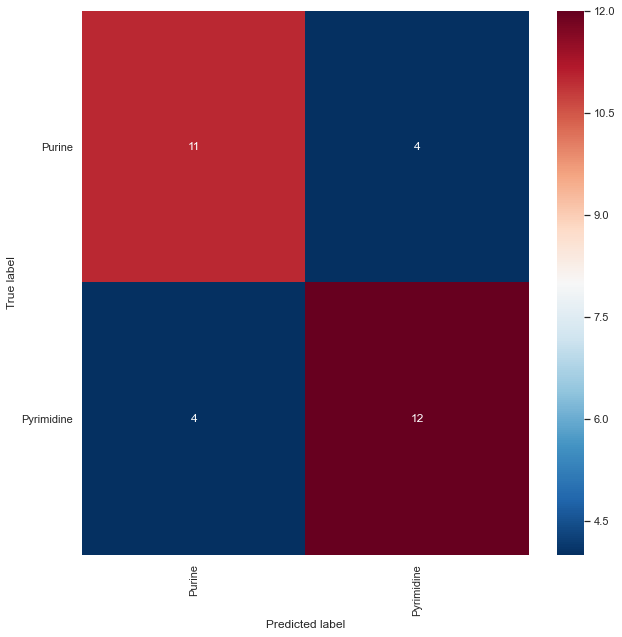

true


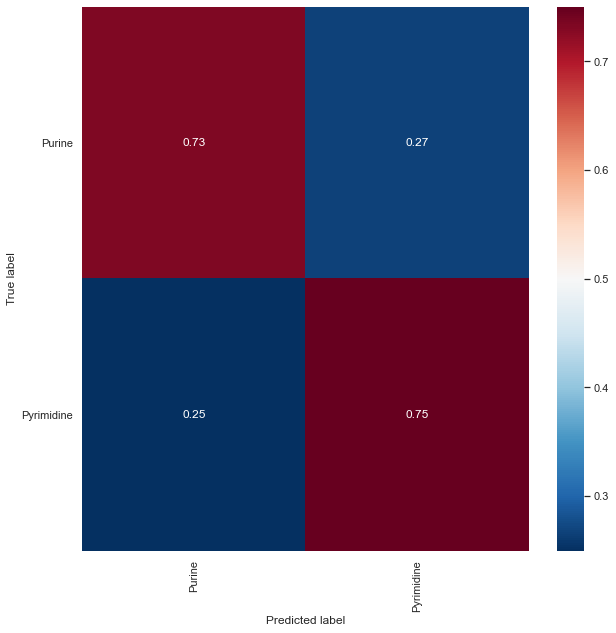

pred


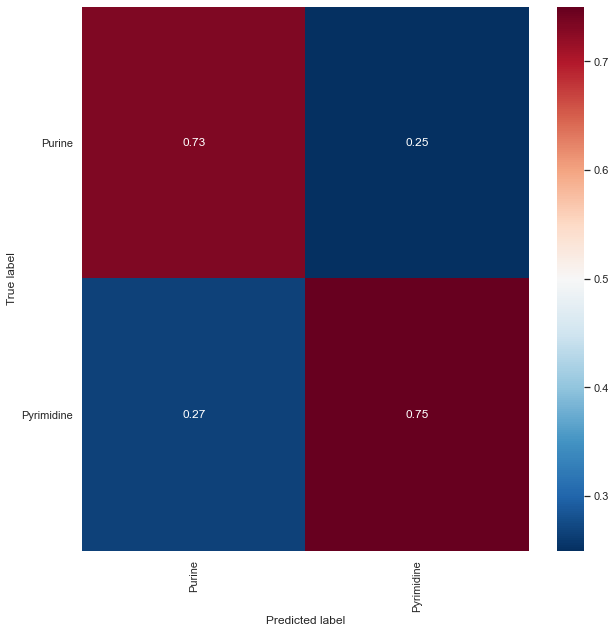

In [56]:
final_params = {'n_neighbors': 4,
                'p': 2,
                'weights': 'distance'}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

knn_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=KNeighborsClassifier, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

How well does the trained classifier predict the different classes?

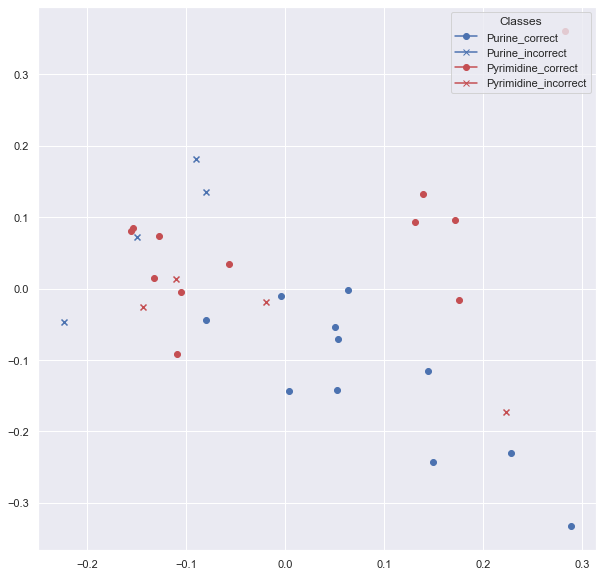

In [57]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['Purine_correct', 'Purine_incorrect', 'Pyrimidine_correct', 'Pyrimidine_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

#### - A vs. T vs. C vs. G

First split the data into a training and test set

In [58]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Standard_array/'
                'NNs/NN_ML_results_actg_split/',
    fluor_data=actg_fluor_data
)

In [59]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Measure the relative importances of the initial 14 features

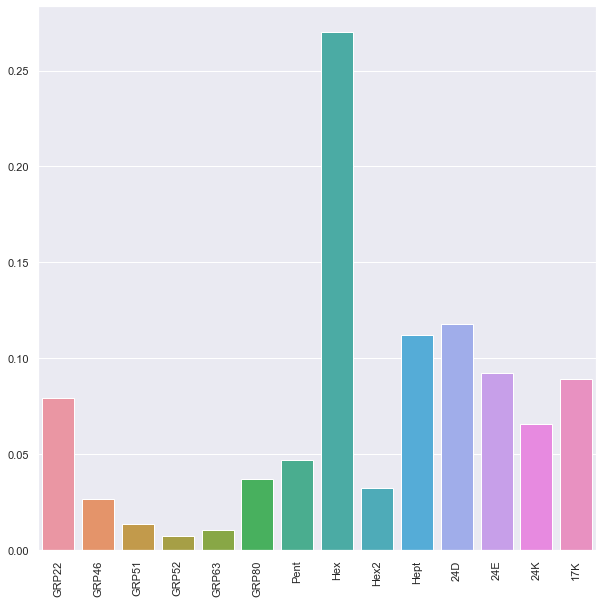

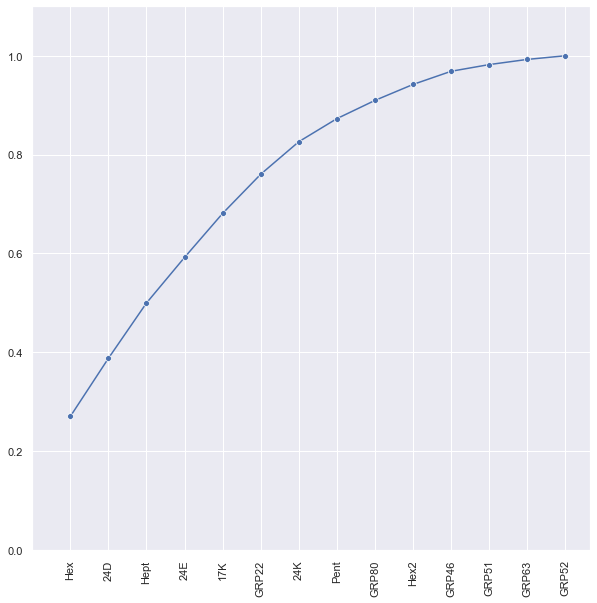

,Feature,Score
0,Hex,0.270011
1,24D,0.117622
2,Hept,0.111991
3,24E,0.092310
4,17K,0.089068
5,GRP22,0.079240
6,24K,0.065816
7,Pent,0.046703
8,GRP80,0.036901
9,Hex2,0.032290


In [60]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- PCA to determine the number of dimensions to reduce the data to has already been run (see above for Scree plot and heatmaps) => n_components = 5

Scatter plots of data transformed to PCA dimensions

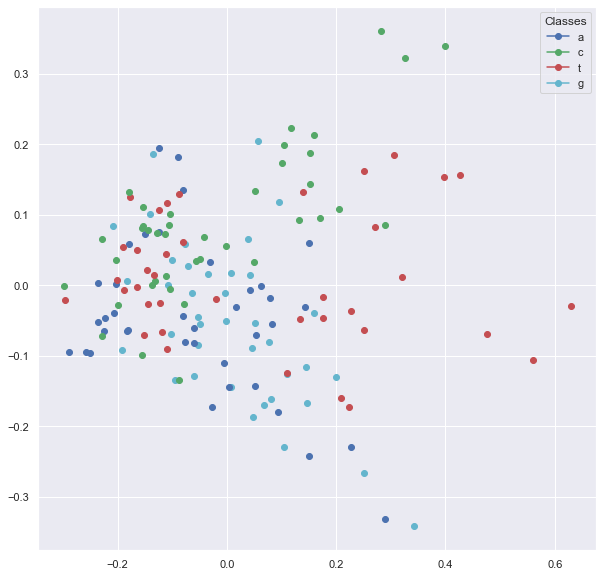

In [61]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['a', 'c', 't', 'g'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

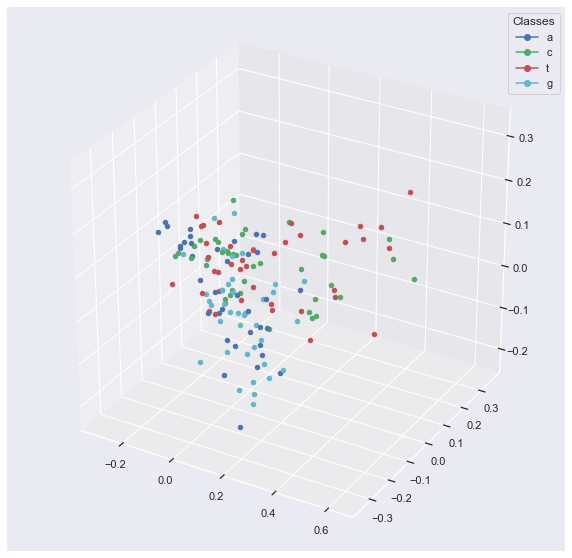

In [62]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['a', 'c', 't', 'g'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

As explained earlier will not use PCA for feature reduction, only to ensure that the features are orthogonal.

In [63]:
n_components = 14

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised, in combination with 5 different methods of dealing with imbalanced classes. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- transformation to 14 orthogonal dimensions using PCA
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [77]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)  # Actual number of x samples will be
    # different owing to oversampling, but don't want to hard code this selection into the pipeline, so for now
    # this estimate will do
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.31622776601683794}
Best score: 0.4926666666666667






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.31622776601683794}
Best score: 0.4926666666666667
All parameter combinations tested:
1 {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 31.622776601683793} 0.46
2 {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 1.0} nan
3 {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial',

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 0.3535533905932738}
Best score: 0.5163333333333333






LinearSVC: no_balancing
Best parameters: {'LinearSVC__C': 0.3535533905932738}
Best score: 0.5163333333333333
All parameter combinations tested:
1 {'LinearSVC__C': 5.656854249492381} 0.508
2 {'LinearSVC__C': 724.0773439350247} 0.508
3 {'LinearSVC__C': 1448.1546878700494} 0.508
4 {'LinearSVC__C': 2048.0} 0.508
5 {'LinearSVC__C': 0.7071067811865476} 0.508
6 {'LinearSVC__C': 64.0} 0.508
7 {'LinearSVC__C': 128.0} 0.508
8 {'LinearSVC__C': 0.25} 0.508
9 {'LinearSVC__C': 2.8284271247461903} 0.508
10 {'LinearSVC__C': 0.1767766952966369} 0.508
11 {'LinearSVC__C': 4.0} 0.508
12 {'LinearSVC__C': 32768.0} 0.508
13 {'LinearSVC__C': 5792.618751480198} 0.508
14 {'LinearSVC__C': 2896.309375740099} 0.508
15 {'LinearSVC__C': 1.4142135623730951} 0.508
16 {'LinearSVC__C': 256.0} 0.508
17 {'LinearSVC__C': 0.3535533905932738} 0.516
18 {'LinearSVC__C': 8.0} 0.508
19 {'Lin

In [78]:
score_df

,Algorithm,Resampling_method,Best_params,Best_accuracy_score,Mean_accuracy_score,Std_dev_accuracy_score
0,LogisticRegression,no_balancing,"{'LogisticRegression__solver': 'sag', 'Logisti...",0.492667,0.456375,0.090503
1,KNeighborsClassifier,no_balancing,"{'KNeighborsClassifier__weights': 'uniform', '...",0.443333,0.380827,0.062684
2,GaussianNB,no_balancing,{},0.427333,0.427333,0.064097
3,LinearSVC,no_balancing,{'LinearSVC__C': 0.3535533905932738},0.516333,0.509293,0.110020
4,SVC,no_balancing,"{'SVC__gamma': 0.03125, 'SVC__C': 1.4142135623...",0.492000,0.334707,0.052122


So, from this spot check, a **support vector classifier with a linear kernel** does a good job.

So, run hyperparameter optimisation for LinearSVC.

In [79]:
fixed_params = ml.define_fixed_model_params(clf=LinearSVC())
random_tuned_params = ml.define_tuned_model_params(clf=LinearSVC(), x_train=ml.train_x)

svc_random_search = ml.run_ml(
    clf=LinearSVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 0.04419417382415922}
Best score: 0.5076666666666667


In [80]:
grid_tuned_params = {'C': np.linspace(0.001, 0.1, 100)}

svc_grid_search = ml.run_ml(
    clf=LinearSVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='grid search', fixed_params=fixed_params,
    tuned_params=grid_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'LinearSVC__C': 0.004}
Best score: 0.5166666666666667


### So, optimal hyperparameter combination:
- C = 0.004

Model cross-validation score: [0.56       0.48       0.56       0.48       0.41666667]
accuracy_score: 0.3870967741935484
recall_score: 0.38839285714285715
precision_score: 0.3055555555555555
f1_score: 0.31169871794871795
cohen_kappa_score: 0.18421052631578938
None


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


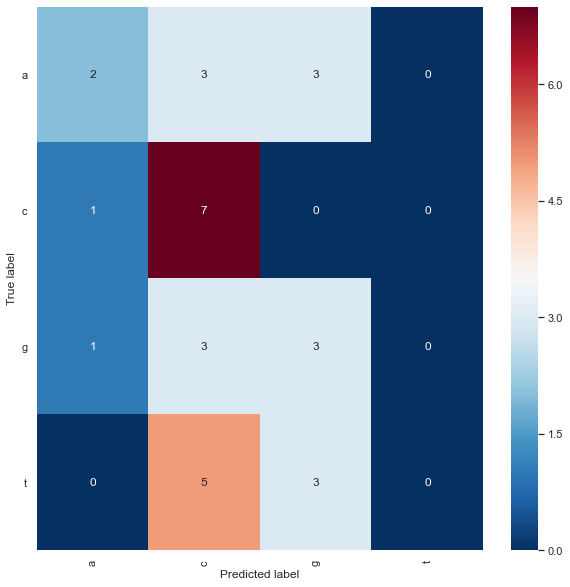

true


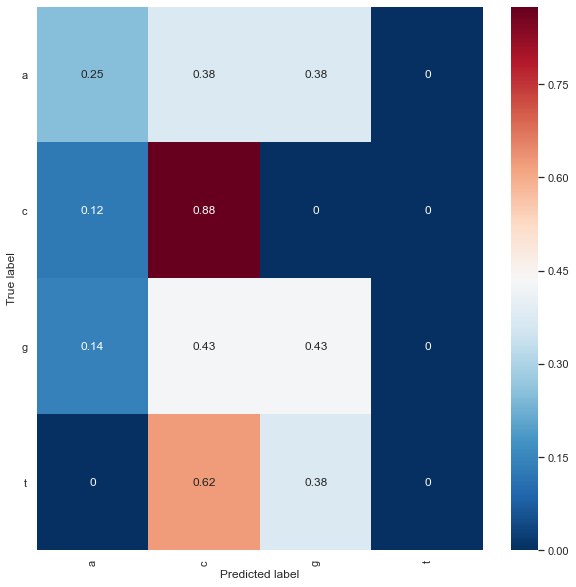

pred


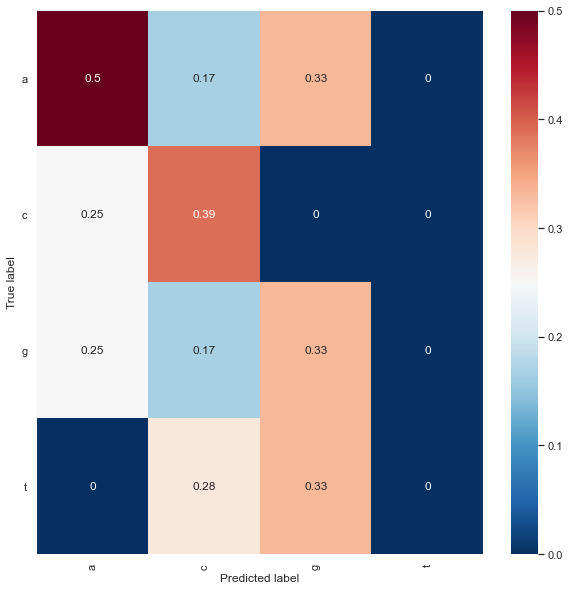

In [81]:
final_params = {'C': 0.004}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=LinearSVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Compare performance of LinearSVC to that of a naive Bayes classifier (which has no parameters to optimise)

Model cross-validation score: [0.56 0.32 0.6  0.32 0.5 ]
accuracy_score: 0.25806451612903225
recall_score: 0.2544642857142857
precision_score: 0.2527056277056277
f1_score: 0.25074224021592445
cohen_kappa_score: 0.00834492350486793
None


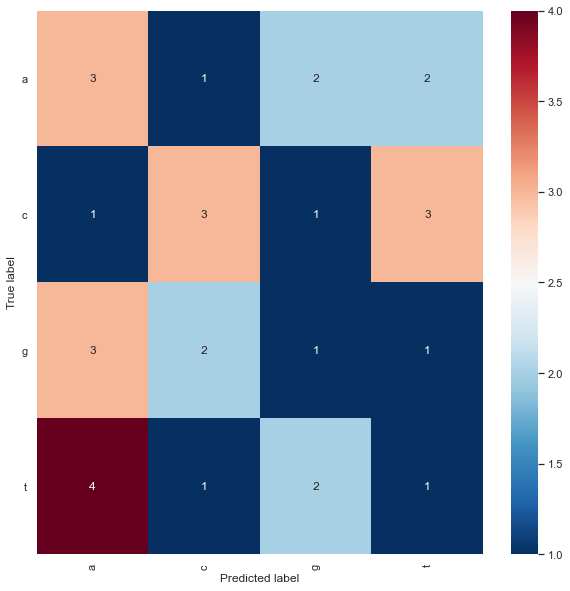

true


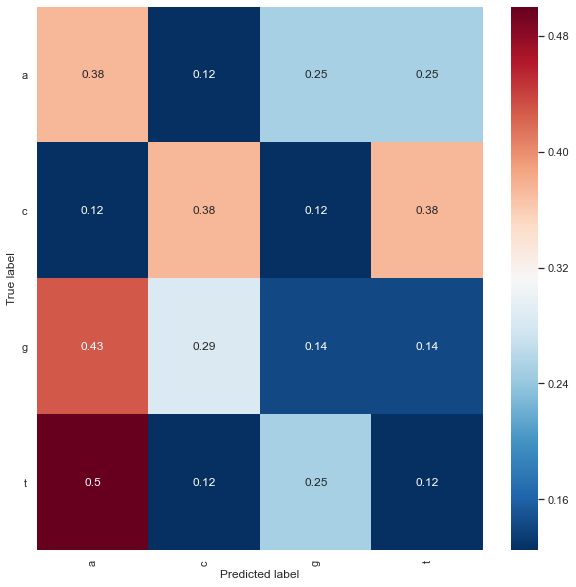

pred


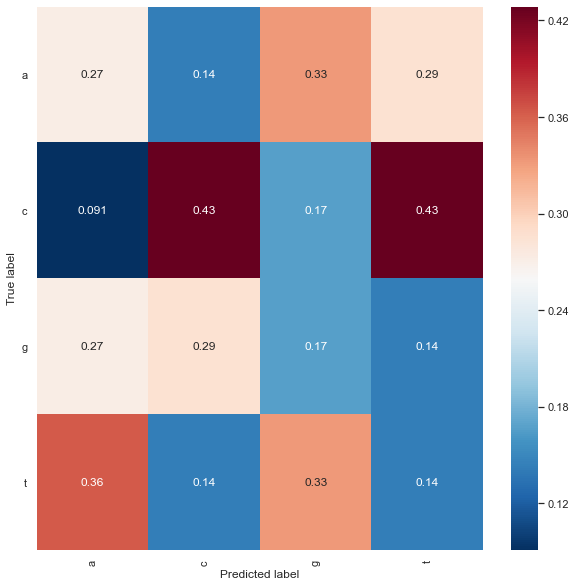

In [82]:
scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

gnb_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=GaussianNB, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params={},
    tuned_params={}, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

The LinearSVC model is slightly overfitted, but I have tried several different models and all suffer from the same effect, as can be seen from the comparatively poorer performance of a Gaussian Naive Bayes model (which has no parameters to tune and is hence much less prone to overfitting) on the test relative to the training data. This can likely be explained by the small size of the dataset; in the random train/test split performed, there is likely variation in the test data that is not captured in the training dataset.

How well does the trained classifier predict the different classes?

Redefine model predictions from LinearSVC

Model cross-validation score: [0.52       0.4        0.6        0.48       0.58333333]
accuracy_score: 0.3870967741935484
recall_score: 0.38839285714285715
precision_score: 0.3055555555555555
f1_score: 0.31169871794871795
cohen_kappa_score: 0.18421052631578938
None


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


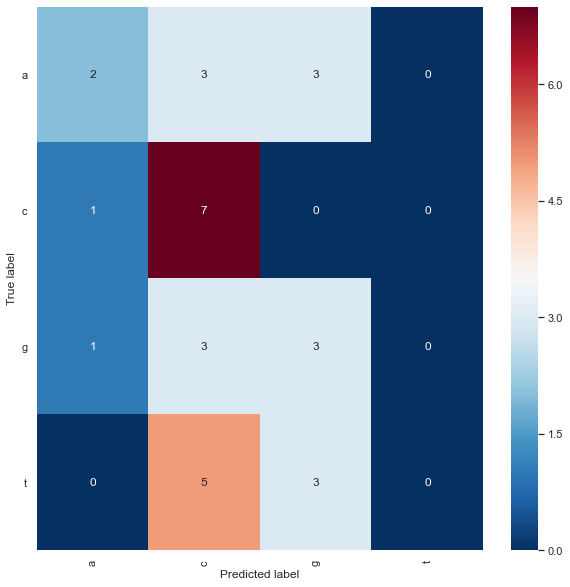

true


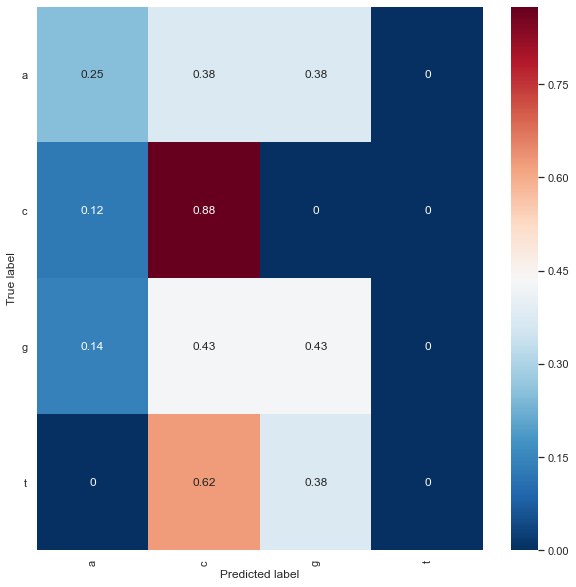

pred


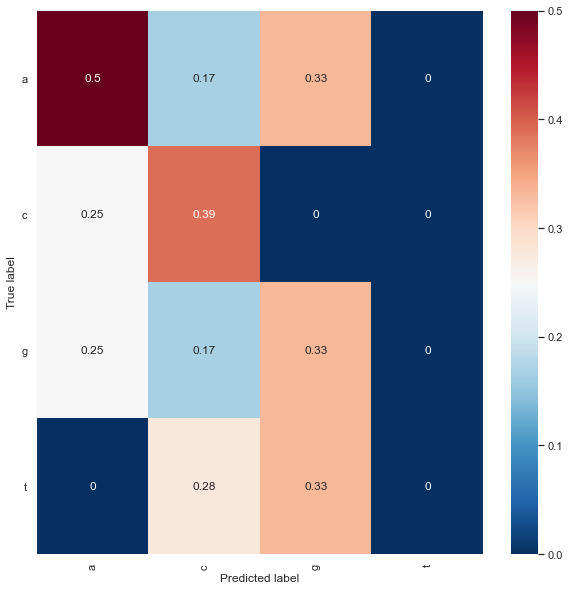

In [84]:
final_params = {'C': 0.004}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=LinearSVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Then plot graph of predictions

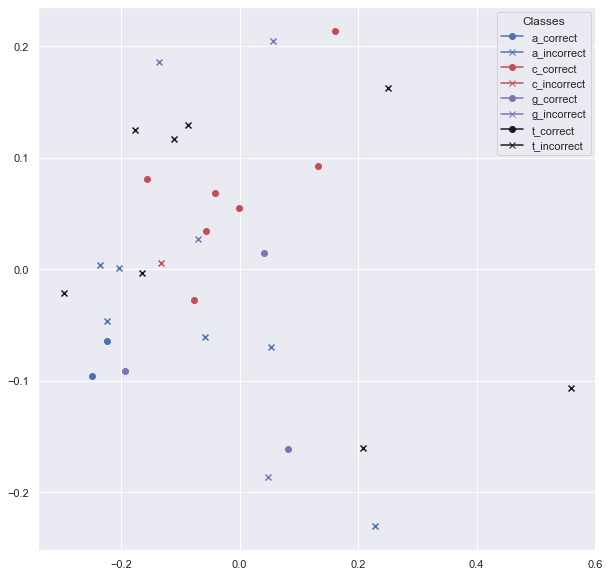

In [85]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['a_correct', 'a_incorrect', 'c_correct', 'c_incorrect',
                'g_correct', 'g_incorrect', 't_correct', 't_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)